In [244]:
print("hello world")

hello world


가설 1. 근로 기간이 짧을 수록 대출등급이 낮을 것이다. \
가설 2. 연간 소득이 낮을 수록 대출등급이 낮을 것이다. \
가설 3. 부채대비 소득비율이 높을 수록 대출 등급이 높을 것이다.\
가설 4. 연체 횟수가 많을 수록 대출등급이 낮을 것이다.\
가설 5. (상환원금+이자) / 대출금액 의 비율이 높을 수록 대출등급이 높을 것이다.

In [245]:
import sklearn as sklean
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [246]:
pro_df = pd.read_csv('C:/Users/user/AppData/Local/Programs/Python/Python312/open_ha/train_ha.csv',sep=',' )
pro_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [318]:
pro_df[pro_df['부채_대비_소득_비율']==9999]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [247]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [248]:
pro_df[['ID']].drop_duplicates()

,ID
0,TRAIN_00000
1,TRAIN_00001
2,TRAIN_00002
3,TRAIN_00003
4,TRAIN_00004
...,...
96289,TRAIN_96289
96290,TRAIN_96290
96291,TRAIN_96291
96292,TRAIN_96292


In [276]:
pro_df2 = pro_df.drop(['대출금액', '대출목적'], axis=1)
pro_df2['상환금액'] = pro_df['총상환원금'] + pro_df['총상환이자']
pro_df2['상환비율'] = pro_df2['상환금액'] / pro_df['대출금액']
pro_df2.head(3)
pro_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   최근_2년간_연체_횟수  96294 non-null  int64  
 8   총상환원금         96294 non-null  int64  
 9   총상환이자         96294 non-null  float64
 10  총연체금액         96294 non-null  float64
 11  연체계좌수         96294 non-null  float64
 12  대출등급          96294 non-null  object 
 13  상환금액          96294 non-null  float64
 14  상환비율          96294 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 11.0+ MB


In [277]:
pro_df2 = pro_df2.drop(['상환금액'], axis=1)
pro_df2.describe()

,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,상환비율
count,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000
mean,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,0.070407
std,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,0.054308
min,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,0.032797
50%,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,0.065304
75%,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,0.096484
max,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000,1.046424


In [278]:
pro_df2['근로기간'].value_counts()

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

In [279]:
pro_df2['최근_2년간_연체_횟수'].value_counts()

최근_2년간_연체_횟수
0     76392
1     13079
2      3896
3      1430
4       697
5       338
6       178
7        86
8        67
9        40
10       35
11       21
12        9
14        8
13        8
16        4
18        2
15        2
17        1
30        1
Name: count, dtype: int64

In [253]:
pro_df2[pro_df2['부채_대비_소득_비율']==9999]


,ID,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환비율
12498,TRAIN_12498,36 months,Unknown,MORTGAGE,0,9999.0,20,2,205356,85884.0,0.0,0.0,C,0.065595


In [254]:
pro_df2[pro_df2['최근_2년간_연체_횟수']==30]

,ID,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환비율
57431,TRAIN_57431,36 months,< 1 year,RENT,168000000,10.23,64,30,819192,391788.0,0.0,0.0,C,0.067277


In [255]:
# 추후 재진행

# pro_te1 = pro_df2.copy()
# pro_te1.info()
# pro_te1['부채_대비_소득_비율'] = pro_te1['부채_대비_소득_비율'].astype(object)

In [256]:
pro_df2['상환비율'].value_counts()

상환비율
0.000000    5407
0.031370     291
0.032220     212
0.099930     165
0.063250     154
            ... 
0.168526       1
0.018930       1
0.032747       1
0.143659       1
0.140798       1
Name: count, Length: 40631, dtype: int64

In [274]:
pro_df2['대출등급'].value_counts()

Series([], Name: count, dtype: int64)

In [294]:
# #1 근로기간 조정
# unknow -> 삭제 
# 10+years & 10+ years = 10년
# <1 year + 1year +< 1 year = 1년
#==은 인식이 안되고 in은 인식이 되네..왜 그럴까

def work_day(a):
    if a in ['< 1 year','<1 year','1 year','1 years']:
        return '1 year'
    elif a in ['10+ years','10+years']:
        return '10 years'
    elif a in ['3']:
        return '3 years'
    else :
        return a

pro_df2['근로기간_수정']=pro_df2['근로기간'].apply(work_day)
pro_df2=pro_df2[pro_df2.근로기간_수정 !='Unknown']


C:\Users\user\AppData\Local\Temp\ipykernel_22136\4129504832.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_df2['근로기간_수정']=pro_df2['근로기간'].apply(work_day)


In [319]:
pro_df2.describe(include='all')

,ID,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환비율,근로기간_수정
count,90623,90623,90623,90623,9.062300e+04,90623.000000,90623.000000,90623.000000,9.062300e+04,9.062300e+04,90623.000000,90623.000000,90623,90623.000000,90623
unique,90623,2,15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,10
top,TRAIN_00000,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,10 years
freq,1,59980,31585,45416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27075,NaN,32481
mean,NaN,NaN,NaN,NaN,9.602653e+07,19.170749,25.392119,0.349735,8.326541e+05,4.350714e+05,53.536078,0.005915,NaN,0.070312,NaN
std,NaN,NaN,NaN,NaN,1.018085e+08,8.669904,12.109055,0.925710,1.042277e+06,4.441825e+05,1396.603298,0.080745,NaN,0.054304,NaN
min,NaN,NaN,NaN,NaN,6.432000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,5.880000e+07,12.600000,17.000000,0.000000,3.126360e+05,1.378380e+05,0.000000,0.000000,NaN,0.032746,NaN
50%,NaN,NaN,NaN,NaN,8.160000e+07,18.630000,24.000000,0.000000,6.047280e+05,2.934120e+05,0.000000,0.000000,NaN,0.065254,NaN
75%,NaN,NaN,NaN,NaN,1.140000e+08,25.410000,32.000000,0.000000,1.067496e+06,5.794080e+05,0.000000,0.000000,NaN,0.096235,NaN


In [300]:
pro_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90623 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            90623 non-null  object 
 1   대출기간          90623 non-null  object 
 2   근로기간          90623 non-null  object 
 3   주택소유상태        90623 non-null  object 
 4   연간소득          90623 non-null  int64  
 5   부채_대비_소득_비율   90623 non-null  float64
 6   총계좌수          90623 non-null  int64  
 7   최근_2년간_연체_횟수  90623 non-null  int64  
 8   총상환원금         90623 non-null  int64  
 9   총상환이자         90623 non-null  float64
 10  총연체금액         90623 non-null  float64
 11  연체계좌수         90623 non-null  float64
 12  대출등급          90623 non-null  object 
 13  상환비율          90623 non-null  float64
 14  근로기간_수정       90623 non-null  object 
dtypes: float64(5), int64(4), object(6)
memory usage: 11.1+ MB


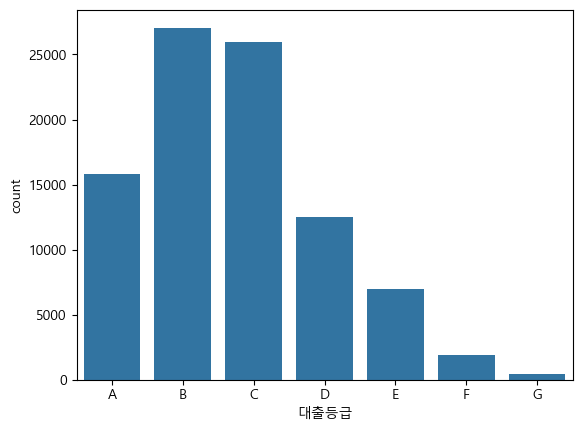

In [302]:
order_grade = ['A','B','C','D','E','F','G']
sns.countplot(data=pro_df2,x='대출등급', order=order_grade)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

<Axes: xlabel='근로기간_수정', ylabel='count'>

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


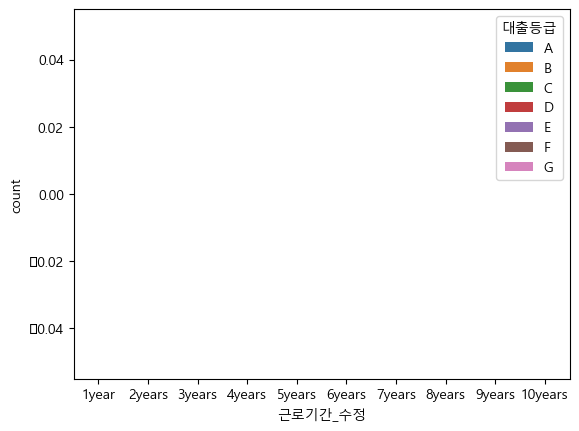

In [305]:
year_list = ['1year', '2years', '3years', '4years', '5years', '6years','7years', '8years', '9years', '10years']

sns.countplot(data=pro_df2, x= '근로기간_수정',hue='대출등급', order = year_list, hue_order=order_grade)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

<Axes: xlabel='최근_2년간_연체_횟수', ylabel='count'>

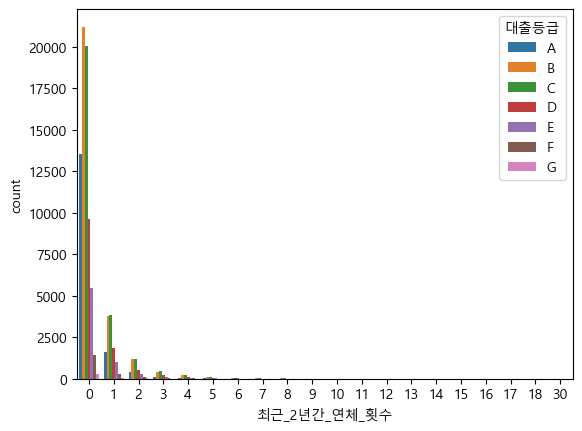

In [308]:
sns.countplot(data=pro_df2, x= '최근_2년간_연체_횟수',hue='대출등급', hue_order=order_grade)

<Axes: xlabel='최근_2년간_연체_횟수', ylabel='대출등급'>

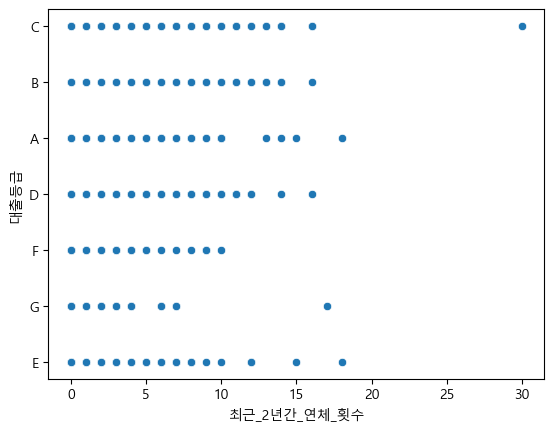

In [313]:
sns.scatterplot(data=pro_df2, x= '최근_2년간_연체_횟수',y='대출등급')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

<Axes: xlabel='연간소득', ylabel='count'>

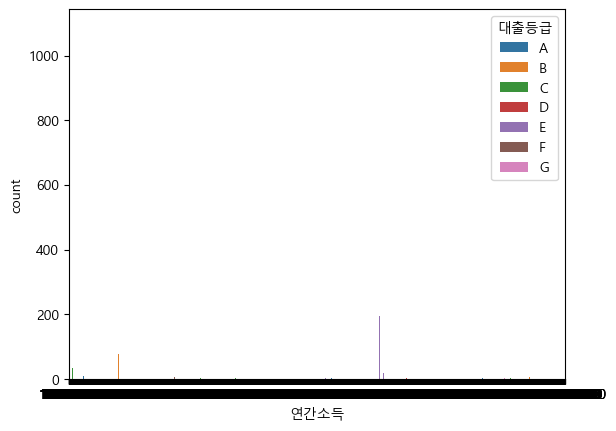

In [314]:
sns.countplot(data=pro_df2, x= '연간소득',hue='대출등급', hue_order=order_grade)

연간소득을 구간별로(일정금액 단위로 나누어볼까)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

<Axes: xlabel='부채_대비_소득_비율', ylabel='count'>

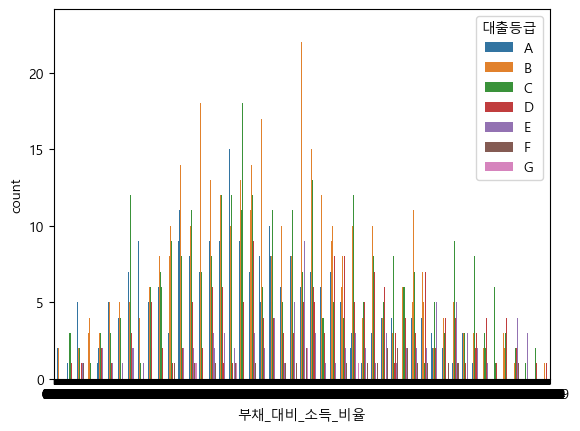

In [315]:
sns.countplot(data=pro_df2, x= '부채_대비_소득_비율',hue='대출등급', hue_order=order_grade)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

<Axes: xlabel='상환비율', ylabel='count'>

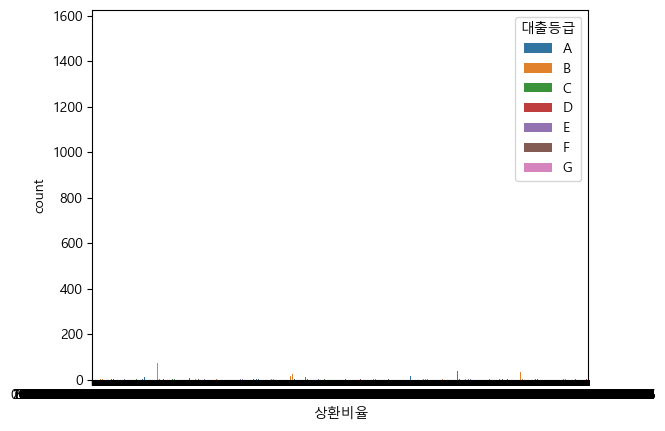

In [316]:
sns.countplot(data=pro_df2, x= '상환비율',hue='대출등급', hue_order=order_grade)

In [317]:
#Pivot 활용하기